In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [25]:
import pandas as pd

# Try reading the file with a different encoding
try:
    df_data = pd.read_csv('spam.csv', encoding='latin1')
except UnicodeDecodeError:
    print("Error: Unable to decode the file using 'latin1' encoding.")


In [26]:
df_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [27]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [28]:
df_data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [29]:
col=['Unnamed: 2','Unnamed: 3','Unnamed: 4']

In [30]:
df_data.drop(col,axis=1,inplace=True)

In [31]:
df_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
label=LabelEncoder()
df_data['v1']=label.fit_transform(df_data['v1'])

In [33]:
df_data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
stem=LancasterStemmer()
stop_words=set(stopwords.words('english'))

In [35]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove @mentions
    text = re.sub(r'@\S+', '', text)
    text = text.replace('!', '')
    text = remove_emojis(text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove pic URLs
    text = re.sub(r'pic.\S+', '', text)
    # Keep only alphabets and specific characters
    text = re.sub(r"[^a-zA-Z\s']", ' ', text)
    # Remove single characters
    text = re.sub(r'\b[a-zA-Z]\b', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize words
    words = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = " ".join(word for word in words if word not in stop_words and len(word) > 2)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [36]:
df_data['text_cleaned']=df_data['v2'].copy(clean_text)

In [37]:
df_data.head()

,v1,v2,text_cleaned
0,0,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro..."


In [38]:
tdif=TfidfVectorizer()
X_train=tdif.fit_transform(df_data['text_cleaned'])

In [40]:
x=X_train
y=df_data['v1']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
model1=MultinomialNB()
model1.fit(x_train,y_train)

MultinomialNB()

In [44]:
y_pred=model1.predict(x_test)

In [46]:
accuracy_score1=accuracy_score(y_pred,y_test)
print('The accuracy score is :',accuracy_score1)
classification_report1=classification_report(y_pred,y_test)
print('The classification report is:',classification_report1)

The accuracy score is : 0.9623318385650225
The classification report is:               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1007
           1       0.72      1.00      0.84       108

    accuracy                           0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.96      1115



In [47]:
model2=LogisticRegression()
model2.fit(x_train,y_train)

LogisticRegression()

In [48]:
y_pred2=model2.predict(x_test)

In [49]:
accuracy_score2=accuracy_score(y_pred,y_test)
print('The accuracy score is:',accuracy_score2)
classification_report2=classification_report(y_pred,y_test)
print('The classification report is:',classification_report2)

The accuracy score is: 0.9623318385650225
The classification report is:               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1007
           1       0.72      1.00      0.84       108

    accuracy                           0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.96      1115



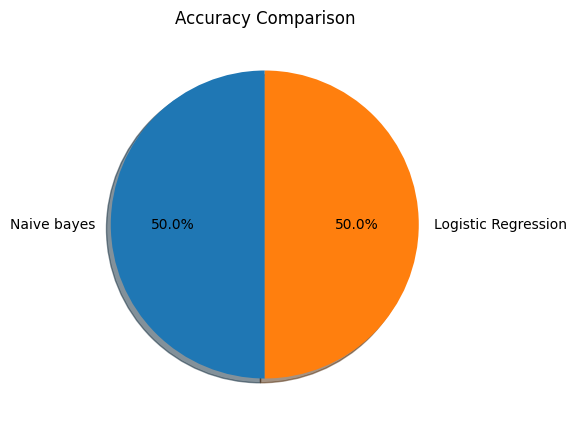

In [52]:
labels = ['Naive bayes', 'Logistic Regression']
sizes = [accuracy_score1,accuracy_score2]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Accuracy Comparison')
plt.show()